Exploratory Data Analysis of Brazilian Houses for Rent

Through an EDA analysis, the goal is to understand the Brazilian rental property market by identifying factors that influence availability, pricing, and regional trends, thereby supporting informed decision-making.

Importing Libraries

In [5]:
# ===========================
# LIBRARIES
# ===========================
import pandas as pd      # Data manipulation
import numpy as np       # Numerical computing
import matplotlib.pyplot as plt  # Basic plotting
import seaborn as sns    # Statistical plots
import missingno as msno  # Visualizing missing data
from scipy import stats   # Advanced statistics


1.ETL PROCESS

In [ ]:
1.1 Data Extraction

In [8]:
# Data Extraction
df = pd.read_csv('imoveis.txt', delimiter='\t', engine='python')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID_IMOVEL           561 non-null    int64  
 1   BAIRRO_IMOVEL       561 non-null    object 
 2   METRAGEM            561 non-null    int64  
 3   TIPO_IMOVEL         561 non-null    object 
 4   VALOR_VENDA         561 non-null    int64  
 5   INCIDENCIA_LUZ      561 non-null    object 
 6   VAGAS_GARAGEM       500 non-null    float64
 7   FLUXO_VEICULOS      561 non-null    object 
 8   COMERCIOS_RAIO_1KM  465 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 39.6+ KB


1.2 Data Cleaning, Transformation ans Load

In [9]:
## Step 1: Checking for missing data
missing_data = df.isnull().sum()
print("Missing Data in each column:\n", missing_data)

Missing Data in each column:
 ID_IMOVEL              0
BAIRRO_IMOVEL          0
METRAGEM               0
TIPO_IMOVEL            0
VALOR_VENDA            0
INCIDENCIA_LUZ         0
VAGAS_GARAGEM         61
FLUXO_VEICULOS         0
COMERCIOS_RAIO_1KM    96
dtype: int64


In [10]:
# Viewing rows where VAGAS_GARAGEM is missing
missing_vagas_garagem = df[df['VAGAS_GARAGEM'].isnull()]
print(missing_vagas_garagem)

     ID_IMOVEL BAIRRO_IMOVEL  METRAGEM  TIPO_IMOVEL  VALOR_VENDA  \
4            5   Recanto Mar        70  Apartamento       416000   
5            6    Jardim Sol       110  Apartamento       468000   
6            7    Santa Rosa        90  Apartamento       436000   
12          13    Jardim Sol        50  Apartamento       403000   
15          16   Recanto Mar       260         Casa       615000   
..         ...           ...       ...          ...          ...   
489        490    Vila Verde       170         Casa       775000   
502        503    Jardim Sol       210         Casa       611000   
503        504    Vila Verde       280         Casa       650000   
543        544    Santa Rosa       140  Apartamento       590000   
553        554   Recanto Mar        50  Apartamento       394000   

    INCIDENCIA_LUZ  VAGAS_GARAGEM FLUXO_VEICULOS  COMERCIOS_RAIO_1KM  
4          Nenhuma            NaN  Intermediário                26.0  
5            Muita            NaN        

In [11]:
# Viewing rows where COMERCIOS_RAIO_1KM is missing
missing_comercios_raio_1km = df[df['COMERCIOS_RAIO_1KM'].isnull()]
print(missing_comercios_raio_1km)

     ID_IMOVEL BAIRRO_IMOVEL  METRAGEM  TIPO_IMOVEL  VALOR_VENDA  \
3            4   Recanto Mar        50  Apartamento       354000   
18          19    Santa Rosa        50  Apartamento       402000   
22          23    Santa Rosa       290         Casa       569000   
27          28    Jardim Sol       140         Casa       520000   
39          40   Recanto Mar       140         Casa       487000   
..         ...           ...       ...          ...          ...   
511        512    Santa Rosa        70  Apartamento       467000   
515        516   Recanto Mar        90  Apartamento       555000   
524        525   Recanto Mar        90  Apartamento       521000   
542        543    Santa Rosa        50  Apartamento       404000   
550        551    Vila Verde       100  Apartamento       589000   

    INCIDENCIA_LUZ  VAGAS_GARAGEM FLUXO_VEICULOS  COMERCIOS_RAIO_1KM  
3            Pouca            2.0        Intenso                 NaN  
18           Pouca            1.0  Interm

Fill missing values with 0 for VAGAS_GARAGEM and COMERCIOS_RAIO_1KM
Premise: We assume that missing values in 'VAGAS_GARAGEM' and 'COMERCIOS_RAIO_1KM' represent properties that do not have garage spaces or commercial establishments within 1km, respectively. Therefore, we are imputing these missing values with 0 to indicate "no garage" or "no nearby commercial establishments".

In [13]:
df['VAGAS_GARAGEM'] = df['VAGAS_GARAGEM'].fillna(0)
df['COMERCIOS_RAIO_1KM'] = df['COMERCIOS_RAIO_1KM'].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID_IMOVEL           561 non-null    int64  
 1   BAIRRO_IMOVEL       561 non-null    object 
 2   METRAGEM            561 non-null    int64  
 3   TIPO_IMOVEL         561 non-null    object 
 4   VALOR_VENDA         561 non-null    int64  
 5   INCIDENCIA_LUZ      561 non-null    object 
 6   VAGAS_GARAGEM       561 non-null    float64
 7   FLUXO_VEICULOS      561 non-null    object 
 8   COMERCIOS_RAIO_1KM  561 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 39.6+ KB


In [14]:
# Checking for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


No duplicated rows were observed. Based on the data types, it seems like most of the columns are correctly typed. However, there are a couple of categorical columns (BAIRRO_IMOVEL, TIPO_IMOVEL, INCIDENCIA_LUZ, and FLUXO_VEICULOS) that are currently marked as object. These columns should ideally be converted to the category data type to:

Optimize memory usage.
Improve performance in analysis.
Clearly indicate they contain categorical data.

In [15]:
# Converting object columns to 'category' type for better performance and clarity
df['BAIRRO_IMOVEL'] = df['BAIRRO_IMOVEL'].astype('category')
df['TIPO_IMOVEL'] = df['TIPO_IMOVEL'].astype('category')
df['INCIDENCIA_LUZ'] = df['INCIDENCIA_LUZ'].astype('category')
df['FLUXO_VEICULOS'] = df['FLUXO_VEICULOS'].astype('category')

# Verify the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID_IMOVEL           561 non-null    int64   
 1   BAIRRO_IMOVEL       561 non-null    category
 2   METRAGEM            561 non-null    int64   
 3   TIPO_IMOVEL         561 non-null    category
 4   VALOR_VENDA         561 non-null    int64   
 5   INCIDENCIA_LUZ      561 non-null    category
 6   VAGAS_GARAGEM       561 non-null    float64 
 7   FLUXO_VEICULOS      561 non-null    category
 8   COMERCIOS_RAIO_1KM  561 non-null    float64 
dtypes: category(4), float64(2), int64(3)
memory usage: 24.8 KB


2. Exploratory Data Analysis (EDA)

In [ ]:
2.1 Analysing distribution of Numerical Variables

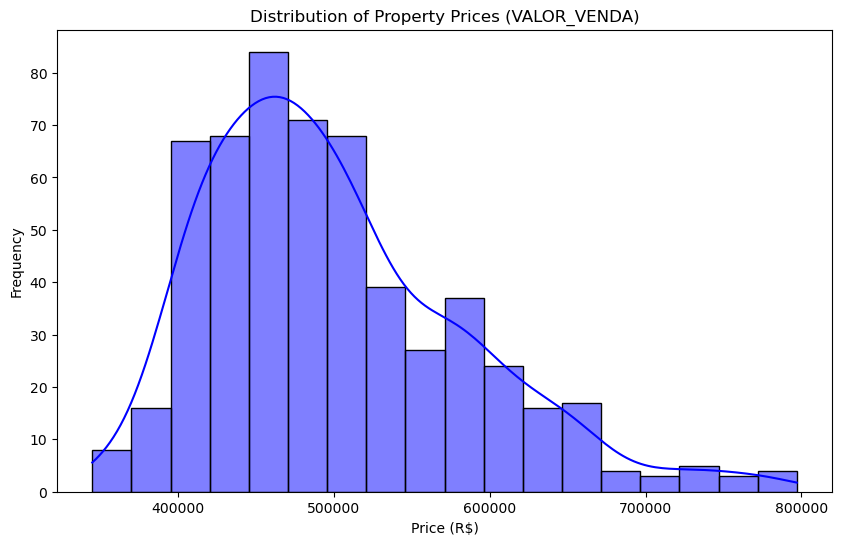

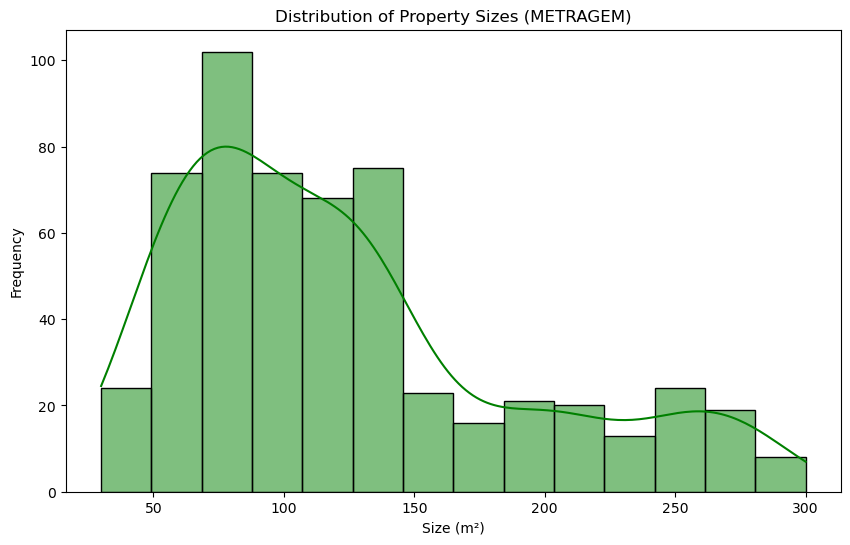

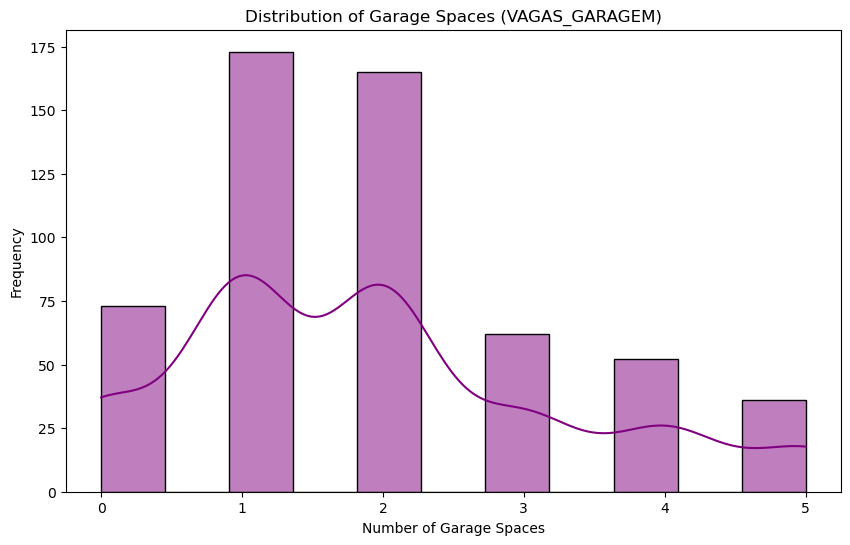

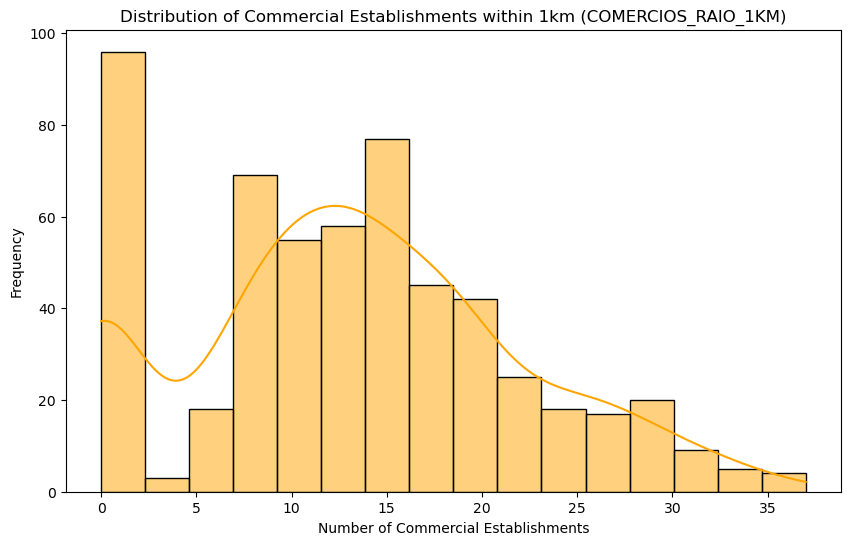

In [16]:
# Distribution of property prices (VALOR_VENDA)
plt.figure(figsize=(10, 6))
sns.histplot(df['VALOR_VENDA'], kde=True, color='blue')
plt.title('Distribution of Property Prices (VALOR_VENDA)')
plt.xlabel('Price (R$)')
plt.ylabel('Frequency')
plt.show()

# Distribution of property sizes (METRAGEM)
plt.figure(figsize=(10, 6))
sns.histplot(df['METRAGEM'], kde=True, color='green')
plt.title('Distribution of Property Sizes (METRAGEM)')
plt.xlabel('Size (m²)')
plt.ylabel('Frequency')
plt.show()

# Distribution of garage spaces (VAGAS_GARAGEM)
plt.figure(figsize=(10, 6))
sns.histplot(df['VAGAS_GARAGEM'], kde=True, color='purple')
plt.title('Distribution of Garage Spaces (VAGAS_GARAGEM)')
plt.xlabel('Number of Garage Spaces')
plt.ylabel('Frequency')
plt.show()

# Distribution of commercial establishments within 1km (COMERCIOS_RAIO_1KM)
plt.figure(figsize=(10, 6))
sns.histplot(df['COMERCIOS_RAIO_1KM'], kde=True, color='orange')
plt.title('Distribution of Commercial Establishments within 1km (COMERCIOS_RAIO_1KM)')
plt.xlabel('Number of Commercial Establishments')
plt.ylabel('Frequency')
plt.show()

Overall Analysis:
Price and Size: Both property prices and sizes are slightly skewed, with most properties falling into mid-range price and size categories. This suggests the dataset is composed primarily of middle-class or moderately priced properties, with fewer luxury or large-scale properties.
Garage Spaces: The bimodal distribution of garage spaces suggests a clear split between properties with 1 or 2 spaces, which likely correlates with apartments or smaller houses.
Commercial Establishments: Many properties have limited access to commercial establishments, suggesting that a large portion of the dataset may represent more residential or suburban areas, while some properties are in more commercially dense locations.

In [ ]:
2.2 Exploring Relationships Between Variables

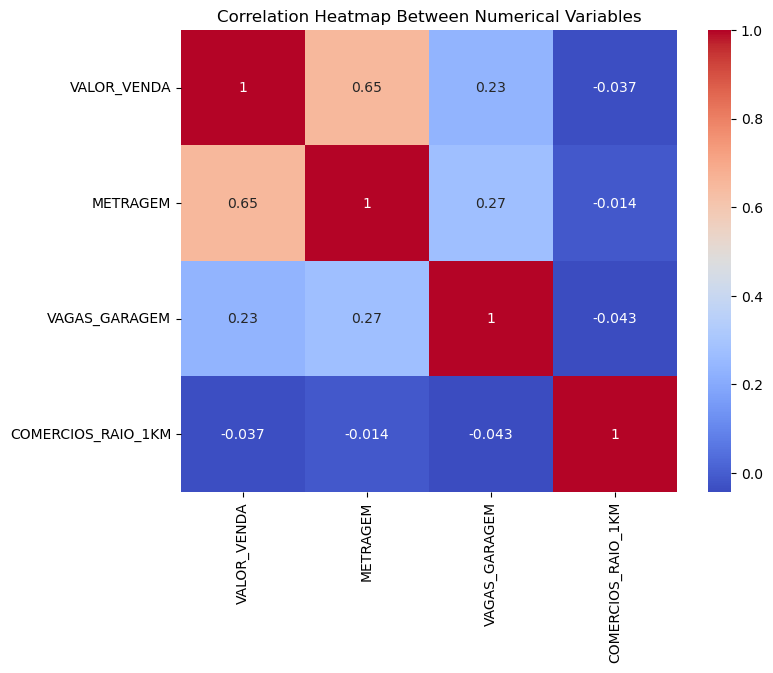

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['VALOR_VENDA', 'METRAGEM', 'VAGAS_GARAGEM', 'COMERCIOS_RAIO_1KM']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap Between Numerical Variables')
plt.show()

Key Insights: 
Property Size (METRAGEM) is the most influential factor affecting property price, with a moderate positive correlation.
Garage Spaces also have some influence on property price but not as much as property size.
Proximity to commercial establishments does not seem to significantly affect property prices or other property characteristics, which may suggest that properties in this dataset are more residential or suburban in nature.

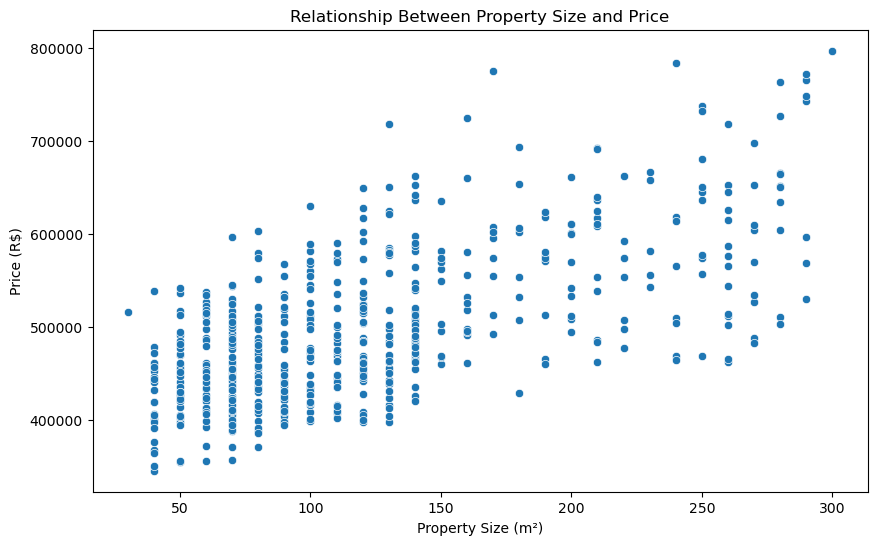

In [18]:
# Scatter plot: Property size vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='METRAGEM', y='VALOR_VENDA', data=df)
plt.title('Relationship Between Property Size and Price')
plt.xlabel('Property Size (m²)')
plt.ylabel('Price (R$)')
plt.show()


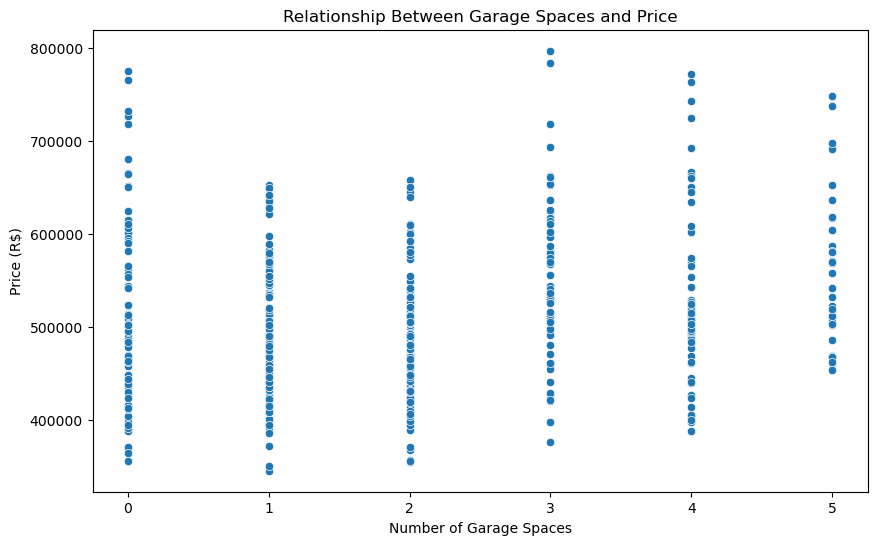

In [19]:
# Scatter plot: Garage spaces vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='VAGAS_GARAGEM', y='VALOR_VENDA', data=df)
plt.title('Relationship Between Garage Spaces and Price')
plt.xlabel('Number of Garage Spaces')
plt.ylabel('Price (R$)')
plt.show()


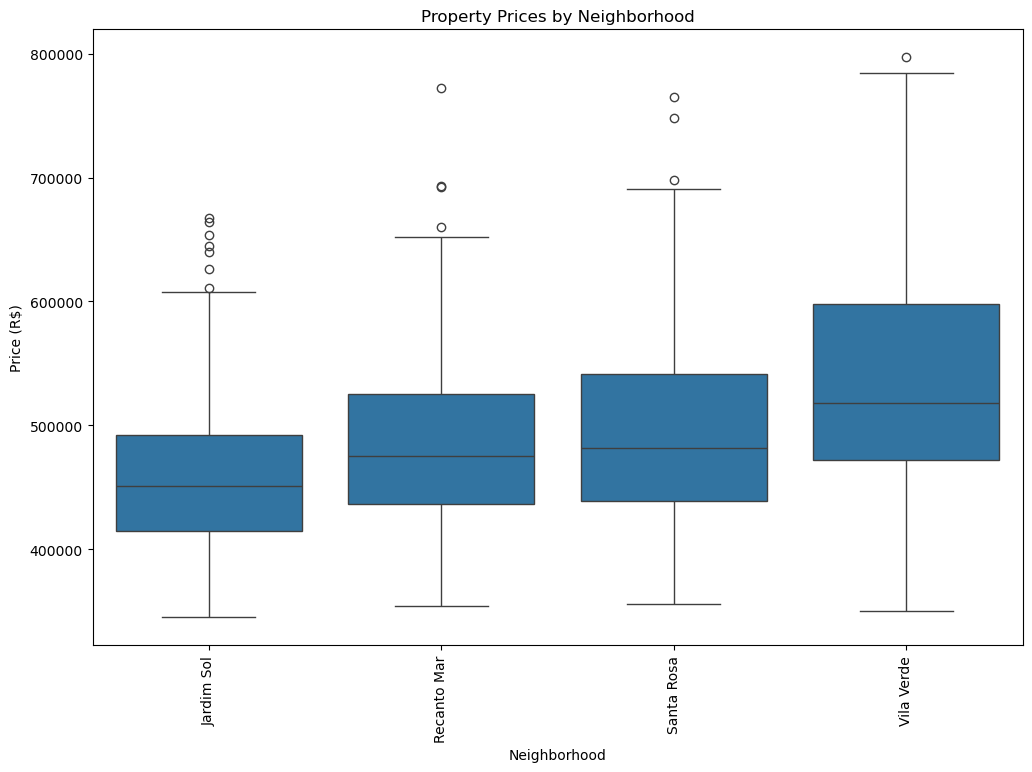

In [20]:
# Box plot: Neighborhood vs Property Price
plt.figure(figsize=(12, 8))
sns.boxplot(x='BAIRRO_IMOVEL', y='VALOR_VENDA', data=df)
plt.title('Property Prices by Neighborhood')
plt.xticks(rotation=90)
plt.xlabel('Neighborhood')
plt.ylabel('Price (R$)')
plt.show()

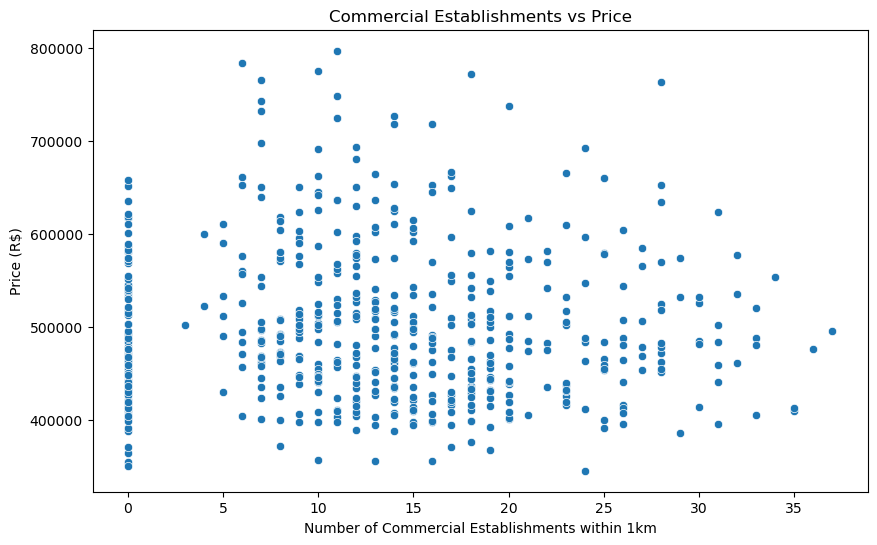

In [21]:
# Scatter plot: Commercial establishments vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='COMERCIOS_RAIO_1KM', y='VALOR_VENDA', data=df)
plt.title('Commercial Establishments vs Price')
plt.xlabel('Number of Commercial Establishments within 1km')
plt.ylabel('Price (R$)')
plt.show()

Key Insights:
Property size is the most important factor influencing property prices. Larger properties tend to have higher prices.
Garage spaces have some influence on price but do not show a strong or consistent relationship.
Neighborhood plays a significant role, with some areas (like Vila Verde) having higher property prices on average.
Commercial establishments do not appear to impact property prices significantly, as the prices remain varied regardless of the number of nearby establishments.

Exploring the Effect of Property Type (House vs. Apartment) on Price and Availability

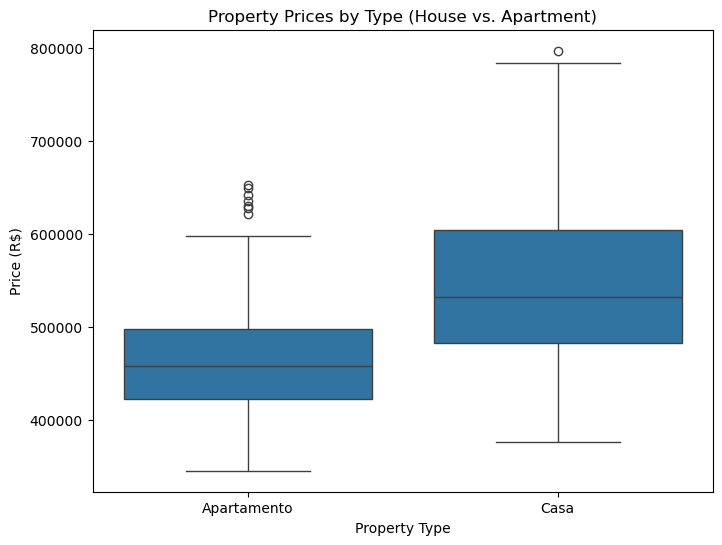

In [22]:
# Box plot: Property Type vs Property Price
plt.figure(figsize=(8, 6))
sns.boxplot(x='TIPO_IMOVEL', y='VALOR_VENDA', data=df)
plt.title('Property Prices by Type (House vs. Apartment)')
plt.xlabel('Property Type')
plt.ylabel('Price (R$)')
plt.show()

Key Insights:
Houses generally tend to be more expensive than apartments, and the price variation is larger for houses.
Apartments have a more compact price range, suggesting that they are more standardized in terms of pricing.

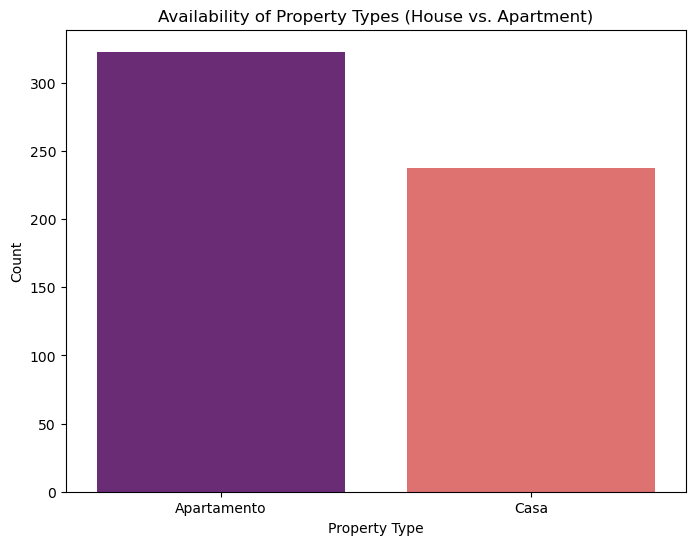

In [25]:
# Count plot: Availability of Property Types
plt.figure(figsize=(8, 6))
sns.countplot(x='TIPO_IMOVEL', data=df, hue='TIPO_IMOVEL', palette='magma', legend=False)
plt.title('Availability of Property Types (House vs. Apartment)')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.show()

Key Insights: 
Apartments are slightly more available than houses in this dataset.
This may imply that apartments dominate the rental market, but houses still make up a significant portion of the available properties.

Let's now explore the effect of sunlight incidence and vehicle traffic on property prices. 

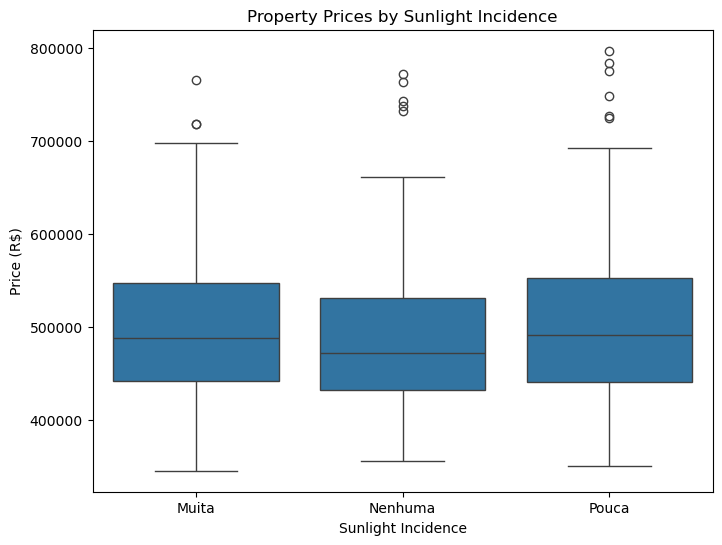

In [26]:
# Box plot: Sunlight Incidence vs Property Price
plt.figure(figsize=(8, 6))
sns.boxplot(x='INCIDENCIA_LUZ', y='VALOR_VENDA', data=df)
plt.title('Property Prices by Sunlight Incidence')
plt.xlabel('Sunlight Incidence')
plt.ylabel('Price (R$)')
plt.show()

Key Insights 
Sunlight Incidence:
Sunlight incidence does not have a significant impact on property prices in this dataset. The price distribution remains fairly consistent across all categories of sunlight exposure.

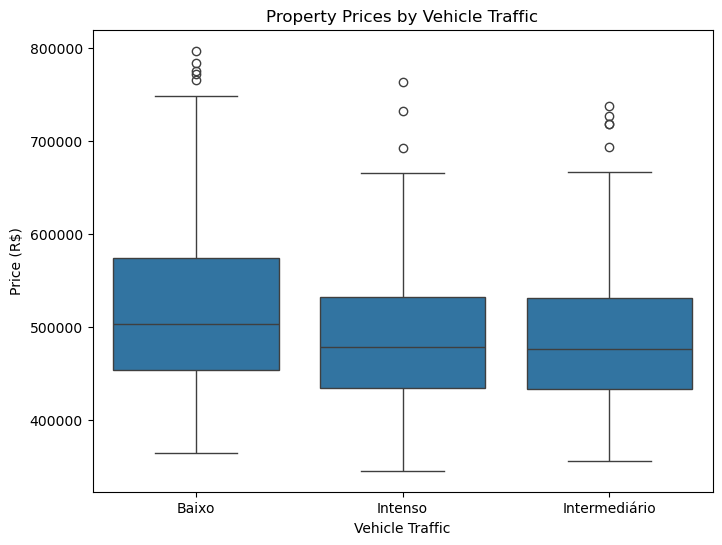

In [27]:
# Box plot: Vehicle Traffic vs Property Price
plt.figure(figsize=(8, 6))
sns.boxplot(x='FLUXO_VEICULOS', y='VALOR_VENDA', data=df)
plt.title('Property Prices by Vehicle Traffic')
plt.xlabel('Vehicle Traffic')
plt.ylabel('Price (R$)')
plt.show()

Vehicle Traffic:
Low vehicle traffic areas appear to command slightly higher property prices on average compared to properties in areas with more intense traffic.
This could suggest that quieter, less congested areas may be more desirable, leading to higher prices.

Final summary of the analysis

Results & Key Insights:
Property Size: Larger properties tend to be more expensive. This is the most significant factor affecting property prices.
Neighborhood: Neighborhoods like Vila Verde and Santa Rosa have higher property prices on average, while Jardim Sol and Recanto Mar have more affordable options.
Garage Spaces: Properties with more garage spaces are generally more expensive, but the effect is not as strong as property size.
Vehicle Traffic: Properties in low vehicle traffic areas tend to have slightly higher prices than those in high traffic areas.
Proximity to Commercial Establishments and Sunlight Incidence have little to no impact on property prices.